# <span style='color:Blue'> PROJECT-DATA MINING-Clustering  </span>

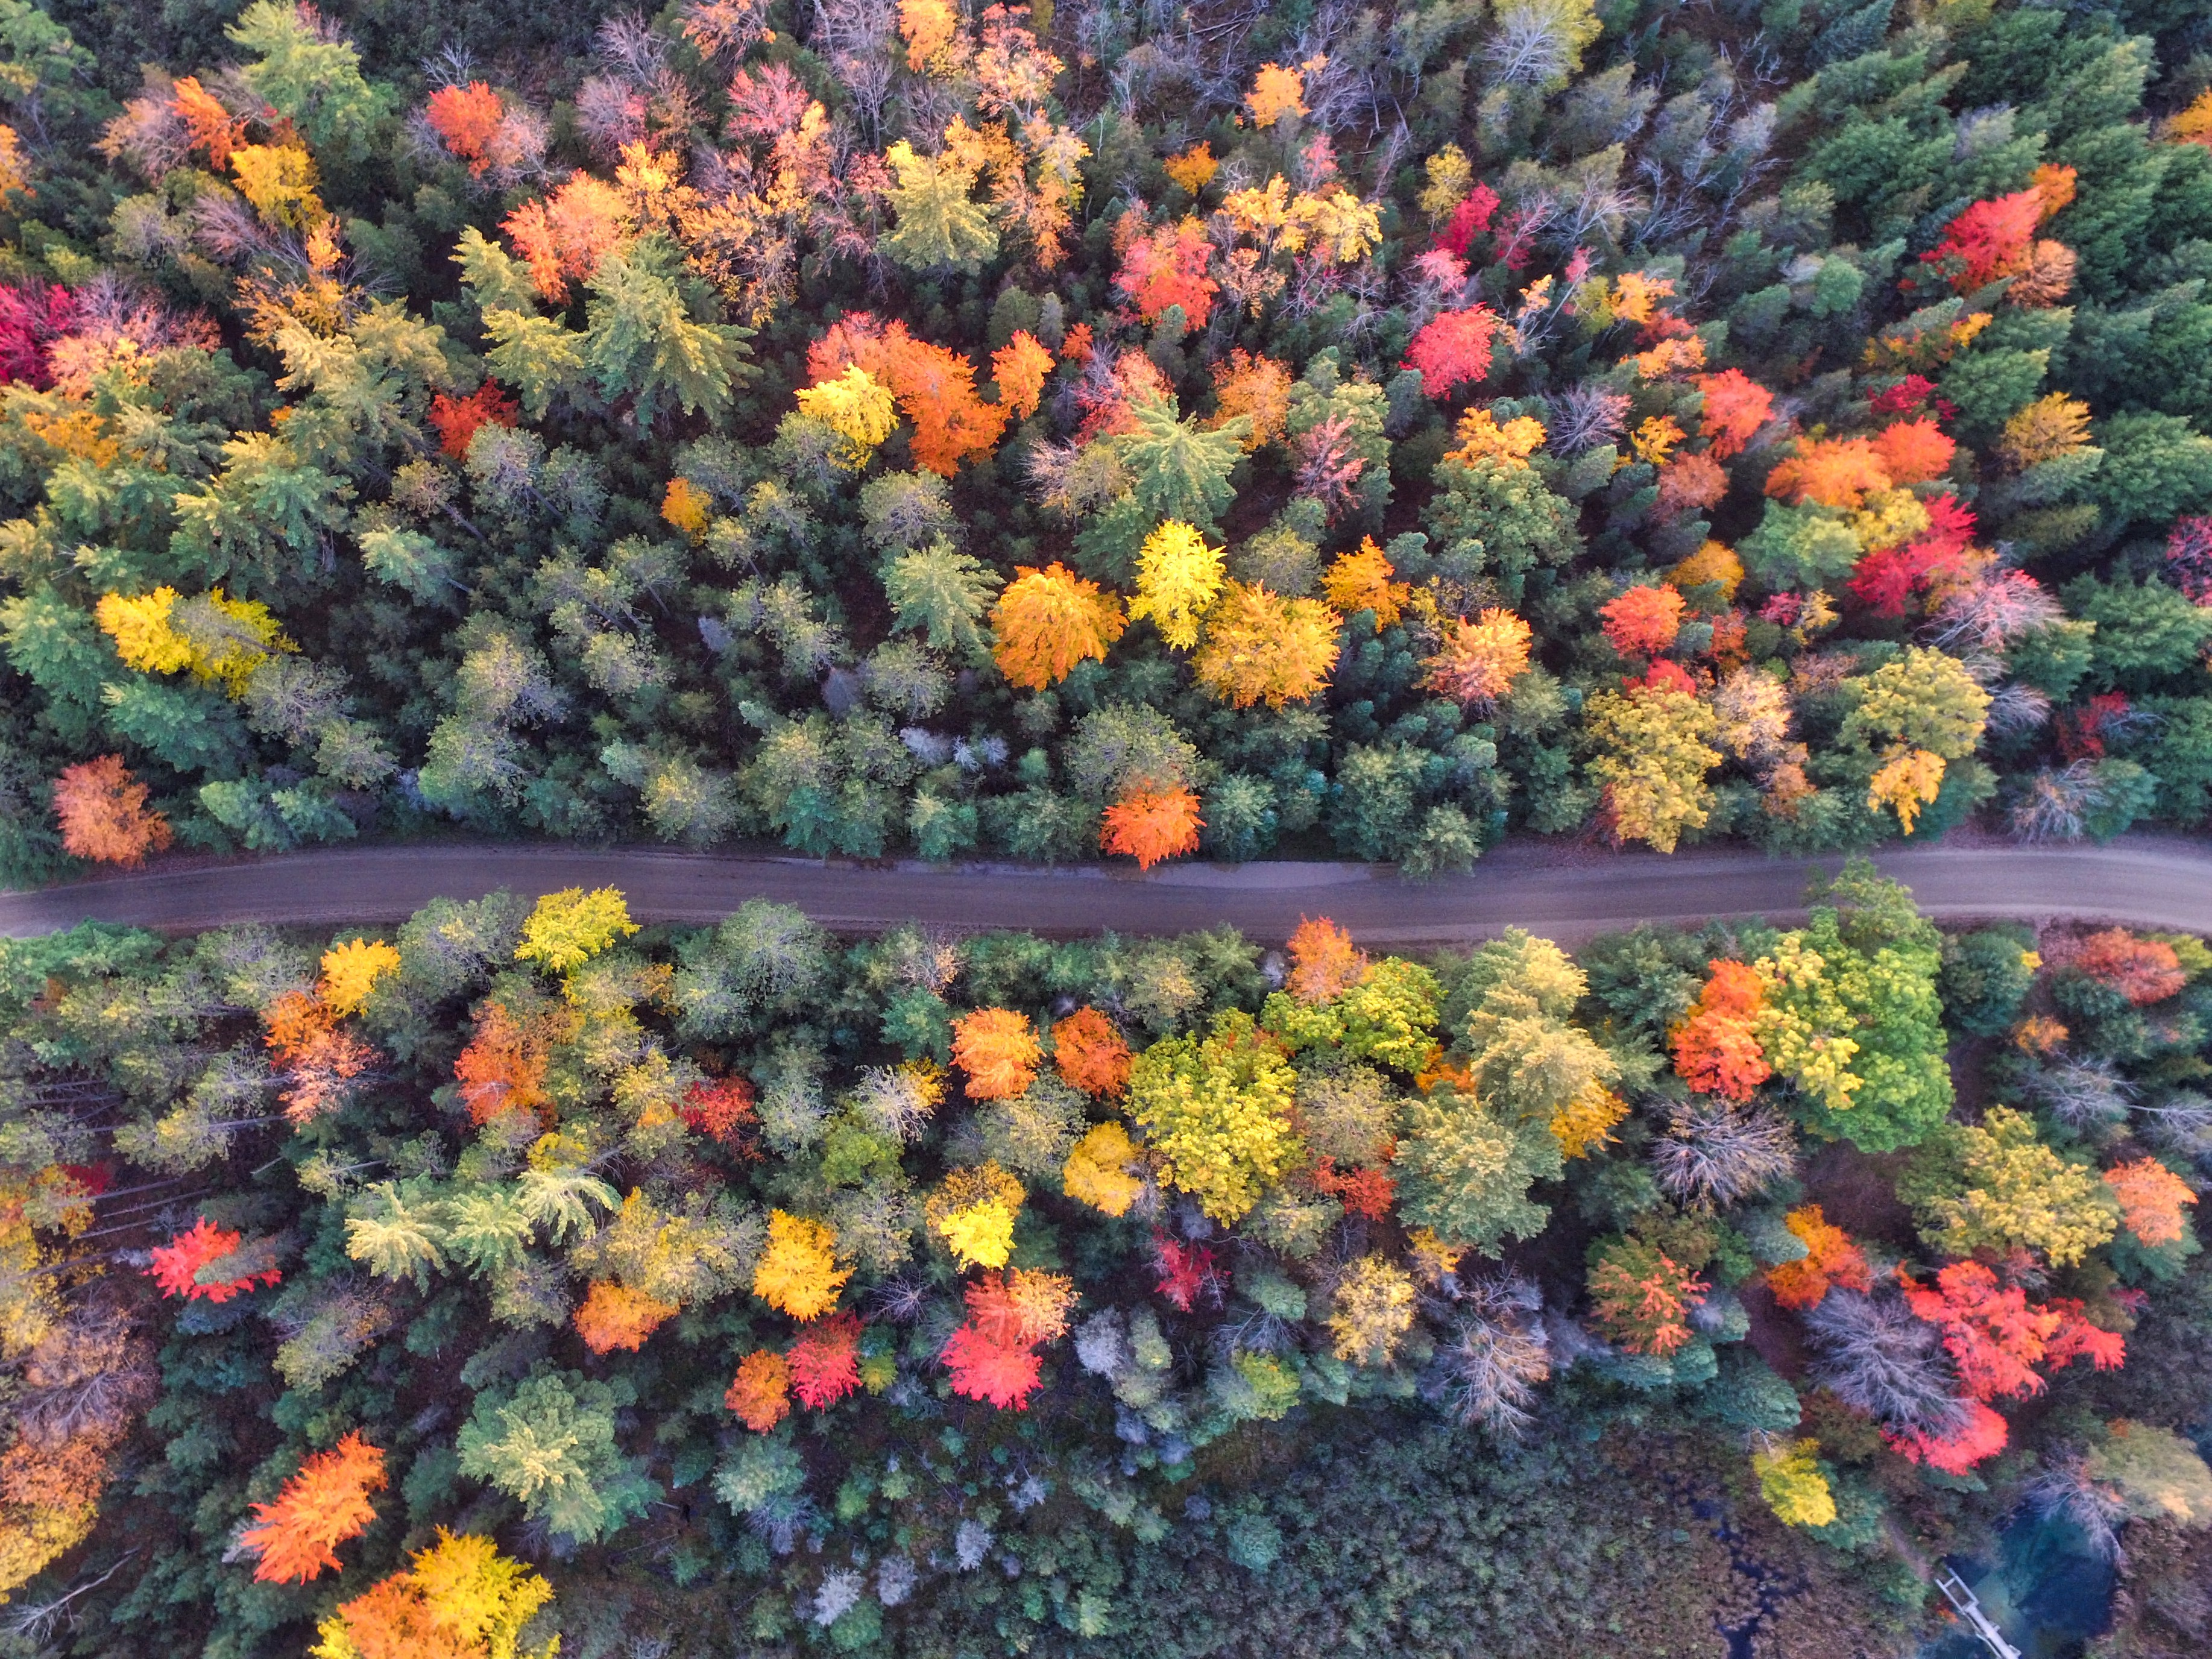

# Problem 1: Clustering

In [2]:
# importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
#sns.set(context="notebook",palette="Spectral",style='darkgrid',font_scale=1.5,color_codes=True)
import warnings
warnings.filterwarnings("ignore")

Data Dictionary for Market Segmentation:

1. spending: Amount spent by the customer per month (in 1000s)

2. advance_payments: Amount paid by the customer in advance by cash (in 100s)

3. probability_of_full_payment: Probability of payment done in full by the customer to the bank

4. current_balance: Balance amount left in the account to make purchases (in 1000s)

5. credit_limit: Limit of the amount in credit card (10000s)

6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [3]:
# reading the dataset
df=pd.read_csv("bank_marketing_part1_Data-1.csv")
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

#### Check for missing values in the dataset.

In [4]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

#### Check the shape (rows and columns), info and the basic measures of descriptive statistics from the data.

In [5]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')

The number of rows of the dataframe is 210 .
The number of columns of the dataframe is 7 .


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
round(df.describe().T,2)

count   mean   std    min    25%    50%    75%  \
spending                      210.0  14.85  2.91  10.59  12.27  14.36  17.30   
advance_payments              210.0  14.56  1.31  12.41  13.45  14.32  15.72   
probability_of_full_payment   210.0   0.87  0.02   0.81   0.86   0.87   0.89   
current_balance               210.0   5.63  0.44   4.90   5.26   5.52   5.98   
credit_limit                  210.0   3.26  0.38   2.63   2.94   3.24   3.56   
min_payment_amt               210.0   3.70  1.50   0.77   2.56   3.60   4.77   
max_spent_in_single_shopping  210.0   5.41  0.49   4.52   5.04   5.22   5.88   

                                max  
spending                      21.18  
advance_payments              17.25  
probability_of_full_payment    0.92  
current_balance                6.68  
credit_limit                   4.03  
min_payment_amt                8.46  
max_spent_in_single_shopping   6.55

From above 5-point Summary,there are 210 customers in the data.

customer maximum spending from credit card is 21,800 to minimum spending of 10,590.

credit card limit of customer varies from minimum amount of 26,300 to maximum limit of 66,800.

There are customer who are spending minimum amount of rs. 4520 to maximum amt of rs. 6550 in single purchase.

The current credit card balance of customer varies from rs. 4900 to rs. 6680.

81% to 92% probability of customer are doing full payment towards credit card expenses.

Also, minimum amount customer is paying towards the credit card expense is rs.770 to rs.846

Currently the credit card balance maintained by the customer is minimum of 4900 to maximum of 6680.

The mean and the median appear fairly close to each other. Showing the dataset has symmetrical distribution.

#### Checking for Duplicates

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Data Visualization

#### Univariate Analysis

In [9]:
# # checking distributions using histograms
# fig =plt.figure(figsize =(15,20))
# ax =fig.gca()
# df.hist(ax =ax)
# plt.tight_layout()
# plt.show();


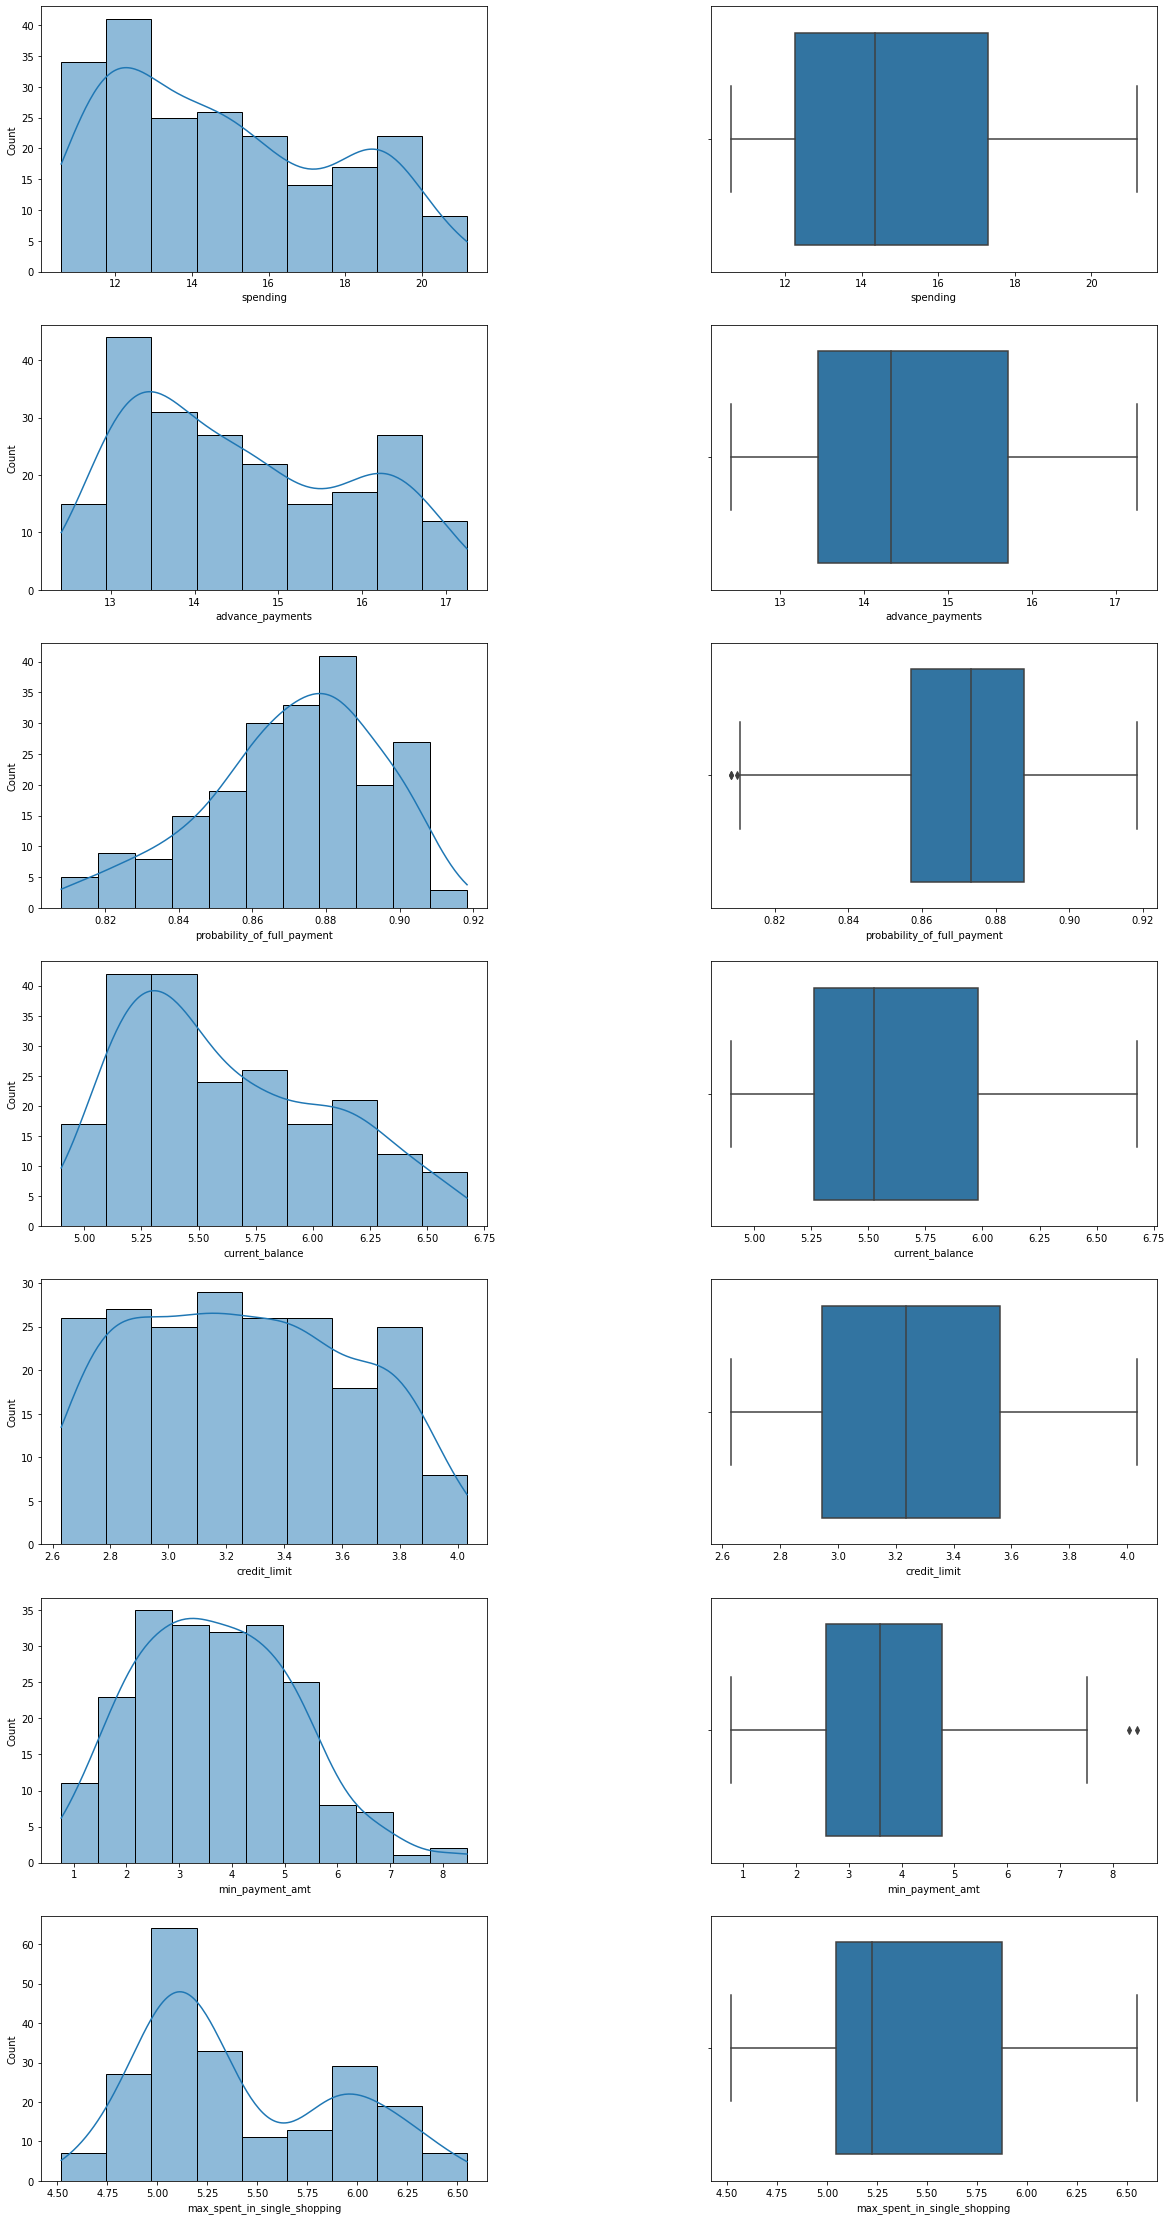

In [10]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(20,40)
sns.histplot(df['spending'], kde=True, ax=axes[0][0])
sns.boxplot(x='spending', data=df, ax=axes[0][1])

sns.histplot(df['advance_payments'] , kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=df , ax=axes[1][1])

sns.histplot(df['probability_of_full_payment'] , kde=True, ax=axes[2][0])
sns.boxplot(x='probability_of_full_payment', data=df , ax=axes[2][1])

sns.histplot(df['current_balance'] , kde=True, ax=axes[3][0])
sns.boxplot(x='current_balance', data=df , ax=axes[3][1])

sns.histplot(df['credit_limit'] , kde=True, ax=axes[4][0])
sns.boxplot(x='credit_limit', data=df , ax=axes[4][1])

sns.histplot(df['min_payment_amt'] , kde=True, ax=axes[5][0])
sns.boxplot(x='min_payment_amt', data=df , ax=axes[5][1])

sns.histplot(df['max_spent_in_single_shopping'] , kde=True, ax=axes[6][0])
sns.boxplot(x='max_spent_in_single_shopping', data=df , ax=axes[6][1])

plt.subplots_adjust(wspace=0.5)
plt.show()

#### Insight

probability_of_full_payment have outliers in lower value and min_payment_amt have outliers in upper values

### Bivariate Analysis/Multivariate Analysis

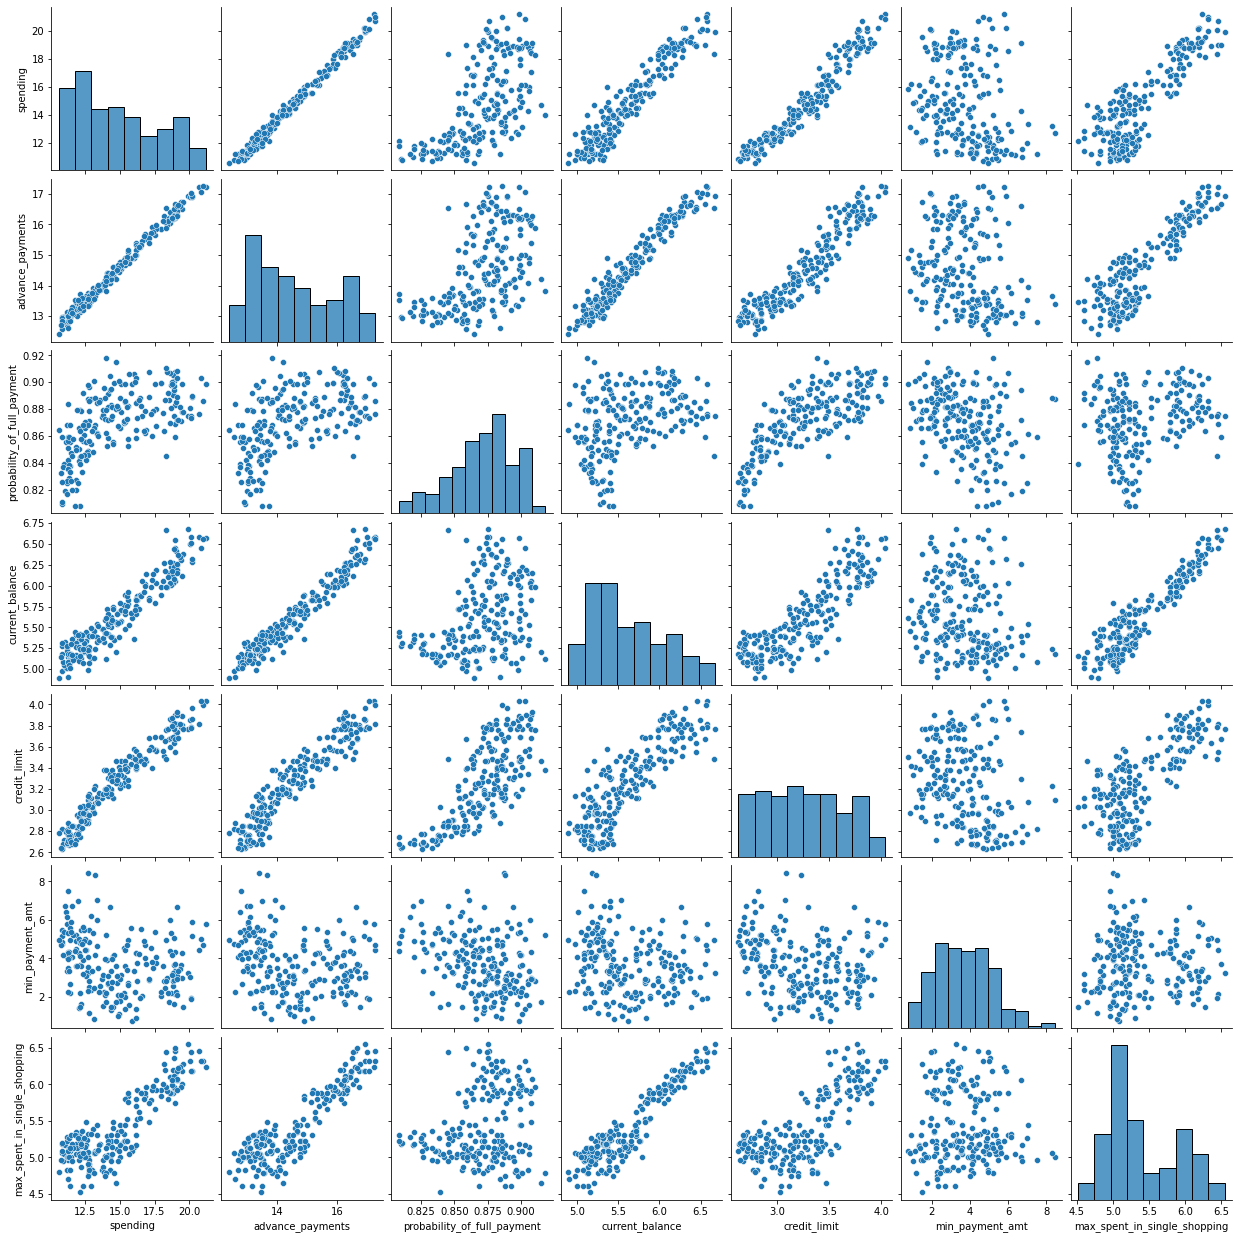

In [11]:
sns.pairplot(df);

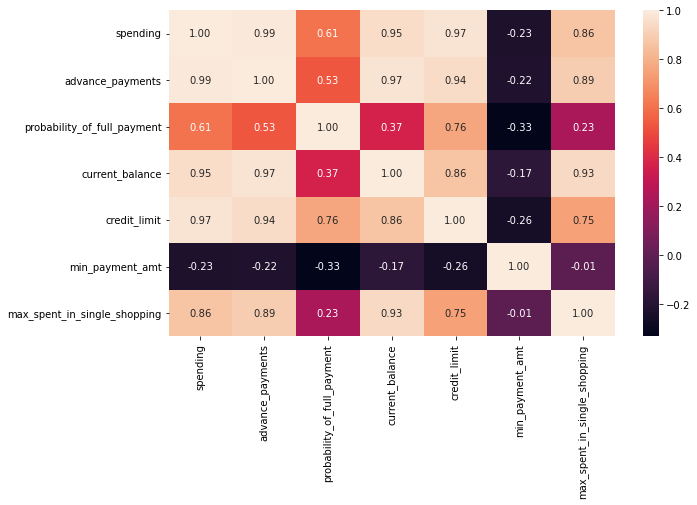

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

### Insight

There is strong correlation observed between few fields. spendings, advance_payments, current_balance, credit_limit, max_spent_in_single_shopping are very highly correlated.



In [13]:
# Lets find the outliers and treat them

df_copy=df.copy()

In [14]:
def detect_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [15]:
lr,ur=detect_outlier(df_copy['probability_of_full_payment'])
print("lower range",lr,"and upper range",ur)

lower range 0.8105875 and upper range 0.9340875


In [16]:
df_copy['probability_of_full_payment']=np.where(df['probability_of_full_payment']>ur,ur,df_copy['probability_of_full_payment'])
df_copy['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lr,lr,df_copy['probability_of_full_payment'])

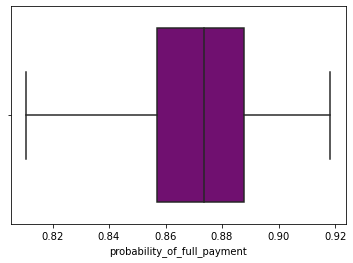

In [17]:
sns.boxplot(x=df_copy.probability_of_full_payment,orient='horizondal',color='purple');

In [18]:
lr,ur=detect_outlier(df_copy['min_payment_amt'])
print("lower range",lr,"and upper range",ur)

lower range -0.7493749999999992 and upper range 8.079625


In [19]:
df_copy['min_payment_amt']=np.where(df['min_payment_amt']>ur,ur,df_copy['min_payment_amt'])
df_copy['min_payment_amt']=np.where(df['min_payment_amt']<lr,lr,df_copy['min_payment_amt'])

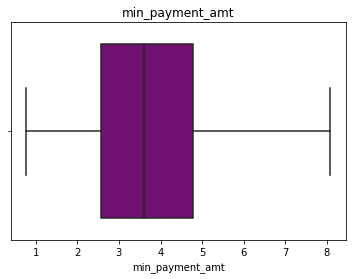

In [20]:
plt.title('min_payment_amt')
sns.boxplot(x=df_copy.min_payment_amt,orient='horizondal',color='purple');

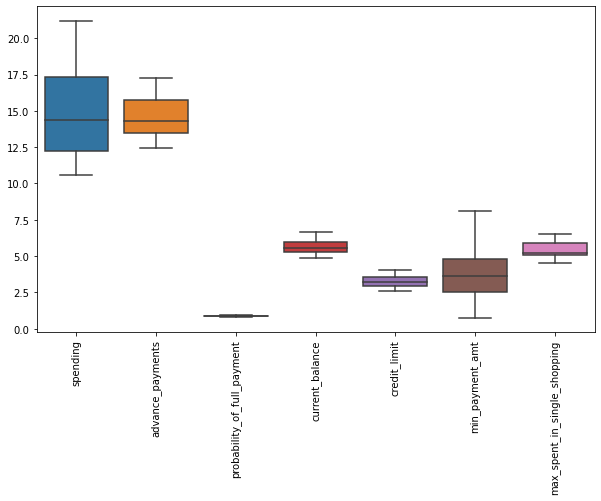

In [21]:
plt.figure(figsize=(10,6))
box = sns.boxplot(data=df_copy)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes, scaling is required in this data set as all features have different weights and to ensure that none of the feature is identified as important only because of the weight, scaling is mandatory for this data set

In [22]:
## Scaling the data using the StandardScaler function

from sklearn.preprocessing import StandardScaler

X = StandardScaler()

#assign scaler to column:

df_scaled =  X.fit_transform(df_copy)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)

df_scaled.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.177628         2.367533   
1  0.393582          0.253840                     1.505071        -0.600744   
2  1.413300          1.428192                     0.505234         1.401485   
3 -1.384034         -1.227533                    -2.571391        -0.793049   
4  1.082581          0.998364                     1.198738         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0      1.338579        -0.298625                      2.328998  
1      0.858236        -0.242292                     -0.538582  
2      1.317348        -0.220832                      1.509107  
3     -1.639017         0.995699                     -0.454961  
4      1.155464        -1.092656                      0.874813

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

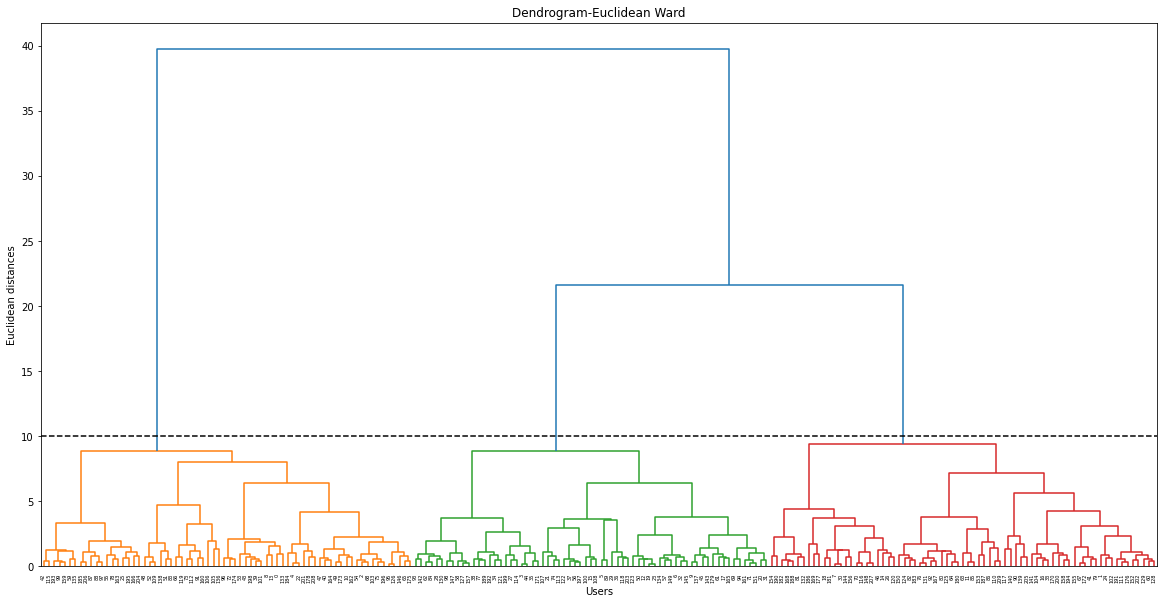

In [24]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))

dend = shc.dendrogram(shc.linkage(df_scaled, method = 'ward', metric='euclidean'),color_threshold=10)
plt.axhline(10, color='black', linestyle='--')
plt.title('Dendrogram-Euclidean Ward')
plt.xlabel('Users')
plt.ylabel('Euclidean distances')
plt.show();

 Plot the truncated dendrogram with the last 10 clusters.

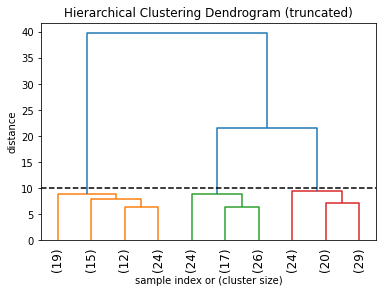

In [25]:
Z_Final = linkage(df_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10   
)
plt.axhline(10, color='black', linestyle='--')
plt.show()

Bank would like to find more than “high consumer” and “low consumer” customer and hence it is better for the business to consider 3 clusters and plot the clusters to confirm if the derived clusters are providing the required segmentation details.

In [26]:
#Method 1

clusters = shc.fcluster(shc.linkage(df_scaled, method='ward'), 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [27]:
## Method 2

clusters = shc.fcluster(shc.linkage(df_scaled, method='ward'),10 , criterion='distance')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

The Cluster derived from above 2 method is same.

In [28]:
df['cluster']= clusters
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  cluster  
0         3.763            3.252                         6.550        1  
1         3.582            3.336                         5.144        3  
2         3.755            3.368                         6.148        1  
3         2.641            5.182                         5.185        2  
4         3.694            2.068                         5.837        1

In [29]:
df.cluster.size

210

In [30]:
df.cluster.value_counts()

3    73
1    70
2    67
Name: cluster, dtype: int64

In [31]:
# lets compute the frequency
df_clust = df.groupby('cluster').mean()
clusters_freq = df['cluster'].value_counts().sort_index()
df_clust['cluster count'] = clusters_freq
df_clust

spending  advance_payments  probability_of_full_payment  \
cluster                                                             
1        18.371429         16.145429                     0.884400   
2        11.872388         13.257015                     0.848072   
3        14.199041         14.233562                     0.879190   

         current_balance  credit_limit  min_payment_amt  \
cluster                                                   
1               6.158171      3.684629         3.639157   
2               5.238940      2.848537         4.949433   
3               5.478233      3.226452         2.612181   

         max_spent_in_single_shopping  cluster count  
cluster                                               
1                            6.017371             70  
2                            5.122209             67  
3                            5.086178             73

In [32]:
df_clust.groupby('cluster count').apply(np.mean).T

cluster count                        67         70         73
spending                      11.872388  18.371429  14.199041
advance_payments              13.257015  16.145429  14.233562
probability_of_full_payment    0.848072   0.884400   0.879190
current_balance                5.238940   6.158171   5.478233
credit_limit                   2.848537   3.684629   3.226452
min_payment_amt                4.949433   3.639157   2.612181
max_spent_in_single_shopping   5.122209   6.017371   5.086178
cluster count                 67.000000  70.000000  73.000000

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [33]:
df_scaled

spending  advance_payments  probability_of_full_payment  current_balance  \
0    1.754355          1.811968                     0.177628         2.367533   
1    0.393582          0.253840                     1.505071        -0.600744   
2    1.413300          1.428192                     0.505234         1.401485   
3   -1.384034         -1.227533                    -2.571391        -0.793049   
4    1.082581          0.998364                     1.198738         0.591544   
..        ...               ...                          ...              ...   
205 -0.329866         -0.413929                     0.722220        -0.428801   
206  0.662292          0.814152                    -0.307399         0.675253   
207 -0.281636         -0.306472                     0.364831        -0.431064   
208  0.438367          0.338271                     1.232775         0.182048   
209  0.248893          0.453403                    -0.779662         0.659416   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
0        1.338579        -0.298625                      2.328998  
1        0.858236        -0.242292                     -0.538582  
2        1.317348        -0.220832                      1.509107  
3       -1.639017         0.995699                     -0.454961  
4        1.155464        -1.092656                      0.874813  
..            ...              ...                           ...  
205     -0.158181         0.193620                     -1.366631  
206      0.476084         0.819993                      0.789153  
207     -0.152873        -1.328049                     -0.830235  
208      0.600814        -0.957188                      0.071238  
209     -0.073258        -0.709053                      0.960473  

[210 rows x 7 columns]

In [34]:
k_means = KMeans(n_clusters=2)
k_means.fit(df_scaled)
k_means.inertia_

659.14740095485

In [35]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [36]:
k_means =KMeans(n_clusters=3)
k_means.fit(df_scaled)
k_means.inertia_

430.283542020681

In [37]:
k_means =KMeans(n_clusters=1)
k_means.fit(df_scaled)
k_means.inertia_

1469.999999999999

In [38]:
k_means =KMeans(n_clusters=4)
k_means.fit(df_scaled)
k_means.inertia_

370.8036260123531

In [39]:
k_means =KMeans(n_clusters=5)
k_means.fit(df_scaled)
k_means.inertia_

327.19828139412465

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    KM = KMeans(n_clusters = i)
    KM.fit(df_scaled)
    # inertia method returns wcss for that model
    wcss.append(KM.inertia_)

In [41]:
wcss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 370.6909292210199,
 326.9841616773592,
 289.21671652775683,
 263.030578930138,
 241.6999690022902,
 224.300700393969,
 204.4988347632118]

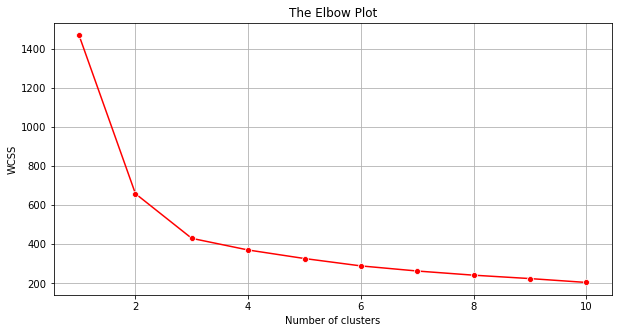

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

We can notice that the wcss is not significantly dropping beyong k=3. K-means clustering technique was used along with elbow curve to define the optimum clusters for this data set. 3 clusters were identified as an optimum number.

In [43]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
labels_3 = k_means.labels_
labels_3

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0])

In [44]:
df["kmeans_cluster_3"]=labels_3
df.head(10)

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   
5     12.70             13.41                       0.8874            5.183   
6     12.02             13.33                       0.8503            5.350   
7     13.74             14.05                       0.8744            5.482   
8     18.17             16.26                       0.8637            6.271   
9     11.23             12.88                       0.8511            5.140   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  cluster  \
0         3.763            3.252                         6.550        1   
1         3.582            3.336                         5.144        3   
2         3.755            3.368                         6.148        1   
3         2.641            5.182                         5.185        2   
4         3.694            2.068                         5.837        1   
5         3.091            8.456                         5.000        2   
6         2.810            4.271                         5.308        2   
7         3.114            2.932                         4.825        3   
8         3.512            2.853                         6.273        1   
9         2.795            4.325                         5.003        2   

   kmeans_cluster_3  
0                 1  
1                 0  
2                 1  
3                 2  
4                 1  
5                 2  
6                 2  
7                 0  
8                 1  
9                 2

Let’s profile the clusters, the way it was done in the hierarchical clustering to identify the suitable pattern for user segmentation

In [48]:
#Method 1
df_kclust_3 = df.groupby('kmeans_cluster_3').mean()
cluster_3_freq = df['kmeans_cluster_3'].value_counts().sort_index()
df_kclust_3['kcluster count'] = cluster_3_freq
df_kclust_3

spending  advance_payments  probability_of_full_payment  \
kmeans_cluster_3                                                             
0                 14.393333         14.314028                     0.881631   
1                 18.495373         16.203433                     0.884210   
2                 11.865775         13.256479                     0.847749   

                  current_balance  credit_limit  min_payment_amt  \
kmeans_cluster_3                                                   
0                        5.506069      3.253944         2.701253   
1                        6.175687      3.697537         3.632373   
2                        5.236394      2.849127         4.777225   

                  max_spent_in_single_shopping   cluster  kcluster count  
kmeans_cluster_3                                                          
0                                     5.115000  2.875000              72  
1                                     6.041701  1.029851              67  
2                                     5.107338  2.070423              71

In [50]:
#Method 2
#round(df.groupby('kmeans_cluster_3').mean(),2).T
round(df_kclust_3.groupby('kmeans_cluster_3').apply(np.mean),2).T

kmeans_cluster_3                  0      1      2
spending                      14.39  18.50  11.87
advance_payments              14.31  16.20  13.26
probability_of_full_payment    0.88   0.88   0.85
current_balance                5.51   6.18   5.24
credit_limit                   3.25   3.70   2.85
min_payment_amt                2.70   3.63   4.78
max_spent_in_single_shopping   5.12   6.04   5.11
cluster                        2.88   1.03   2.07
kcluster count                72.00  67.00  71.00

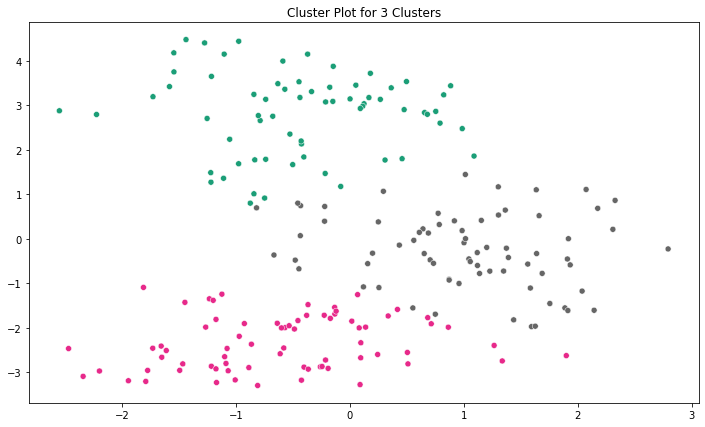

In [51]:
from sklearn.decomposition import PCA
pca_2=PCA(2)
plot_columns=pca_2.fit_transform(df_scaled)
plt.figure(figsize=(12,7))
sns.scatterplot(x=plot_columns[:,1],y=plot_columns[:,0],hue=KMeans(n_clusters=3,random_state=0).fit(df_scaled).labels_,
                palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 3 Clusters')
plt.show()

In [52]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  cluster  \
0         3.763            3.252                         6.550        1   
1         3.582            3.336                         5.144        3   
2         3.755            3.368                         6.148        1   
3         2.641            5.182                         5.185        2   
4         3.694            2.068                         5.837        1   

   kmeans_cluster_3  
0                 1  
1                 0  
2                 1  
3                 2  
4                 1

In [53]:
df.to_csv('Clustering.csv')

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Kindly refer to the Business report for Cluster Profiling and promotional strategies

# Thank you
